In [2]:
 import pandas as pd

In [3]:
import random

In [4]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting 
from PIL import Image # Image processing
import json  #json file I/O
#from mpl_toolkits.basemap import Basemap

In [5]:
with open(r'C:\Users\Ayush\Desktop\ships-in-satellite-imagery\shipsnet.json') as data_file:
    data = json.load(data_file)
Shipsnet= pd.DataFrame(data)
print(Shipsnet.head())
print(Shipsnet.shape)

                                                data  labels  \
0  [82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...       1   
1  [76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...       1   
2  [125, 127, 129, 130, 126, 125, 129, 133, 132, ...       1   
3  [102, 99, 113, 106, 96, 102, 105, 105, 103, 10...       1   
4  [78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...       1   

                                   locations             scene_ids  
0    [-118.2254694333423, 33.73803725920789]  20180708_180909_0f47  
1    [-122.33222866289329, 37.7491755586813]  20170705_180816_103e  
2  [-118.14283073363218, 33.736016066914175]  20180712_211331_0f06  
3   [-122.34784341495181, 37.76648707436548]  20170609_180756_103a  
4   [-122.34852408322172, 37.75878462398653]  20170515_180653_1007  
(4000, 4)


In [6]:
# Function to Plotting Image of ships 
def Plotting_Image(array,pos):
    nrows = 2
    
    # Creating Figure and Axis to plot 
    fig, axes = plt.subplots(nrows)
    
    # appending size of plot
    fig.set_figheight(10)
    fig.set_figwidth(10)
    
    for row in axes:
        position = random.choice(pos)
        pixels = np.asarray(array[position])
        pix = pixels.reshape((3,6400))
        pix_T = pix.T
        imge = pix_T.reshape((80,80,3)).astype('uint8')
        plot(row,imge)
    plt.show()

def plot(axrow,imge):
    axrow.imshow(imge)

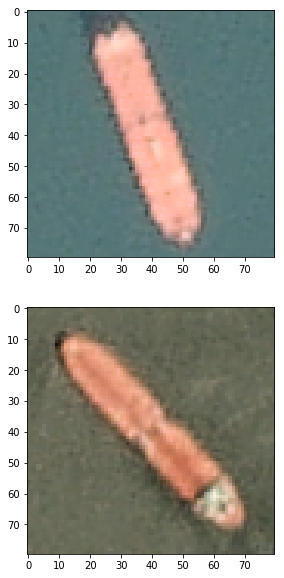

In [7]:
pos = [random.randint(0,9) for p in range(0,2000)]
Plotting_Image(Shipsnet['data'],pos)

In [8]:
a,b =[],[]
for i,j in Shipsnet['locations']:
    a.append(i)
    b.append(j)

In [10]:
plt.figure(figsize=(25,10))
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
X, Y = m(a,b)
m.plot(X,Y,'o',color='r',markersize = 3)
m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='g',lake_color='aqua')
plt.show()

NameError: name 'Basemap' is not defined

<Figure size 1800x720 with 0 Axes>

In [11]:
def Loc_append(Location):
    a,b =[],[]
    for i,j in Location:
        a.append(i)
        b.append(j)
    return a,b
Location_Ship = Shipsnet[Shipsnet['labels']==1]['locations']
Location_NoShip = Shipsnet[Shipsnet['labels']==0]['locations']
ship_l1,ship_l2 = Loc_append(Location_Ship)
No_ship_l1,No_ship_l2 = Loc_append(Location_NoShip)
 

In [12]:
def plot_Ship(l1,l2,color):
    
    plt.figure(figsize=(25,10))
    m = Basemap(projection='mill',llcrnrlat=35,llcrnrlon=-124,urcrnrlat=39,urcrnrlon=-120,resolution='h')
    X, Y = m(l1,l2)
    m.plot(X,Y,'o',color=color,markersize = 3)
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='g',lake_color='aqua')
    plt.show()

In [13]:
plot_Ship(ship_l1,ship_l2,'r')

NameError: name 'Basemap' is not defined

<Figure size 1800x720 with 0 Axes>

In [14]:
plot_Ship(No_ship_l1,No_ship_l2,'b')

NameError: name 'Basemap' is not defined

<Figure size 1800x720 with 0 Axes>

In [15]:
Shipsnet['labels'].value_counts()

0    3000
1    1000
Name: labels, dtype: int64

In [16]:
#creating Target and Train Data 
Target = data['labels'] 
Train = np.asarray(data['data']).astype('uint8')
Train.shape

(4000, 19200)

In [17]:
# Reducing Size of Train Data
train = Train/255
train.size

76800000

In [18]:
from sklearn.decomposition import PCA   #PCA on Train Data
pca = PCA(n_components=2)             #PCA on Train data to reduce size of Data.
pca.fit(train)
train_pca = pca.transform(train)
train_pca.size
train_pca.shape


(4000, 2)

In [19]:
#Splitting Training and Testing Data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(train_pca,Target,test_size = 0.2 ,random_state = 123)

In [20]:
# importing Algorithms to fit model and predict Output

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [21]:
# creating list of tuple wth model and its name  
models = []
models.append(('GNB',GaussianNB()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
#models.append(('RF',RandomForestClassifier()))
models.append(('LG',LogisticRegression()))
models.append(('SVC',SVC()))

In [22]:
from sklearn.cross_validation import cross_val_score

acc = []   # list for collecting Accuracy of all model
names = []    # List of model name

for name, model in models:
    
    acc_of_model = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
    
    # appending Accuray of different model to acc List
    acc.append(acc_of_model)
    
    # appending name of models
    names.append(name)
    
    # printing Output 
    Out = "%s: %f" % (name, acc_of_model.mean())
    print(Out)

C:\Users\Ayush\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


GNB: 0.796269
KNN: 0.790037
DT: 0.751291
LG: 0.803775
SVC: 0.791289


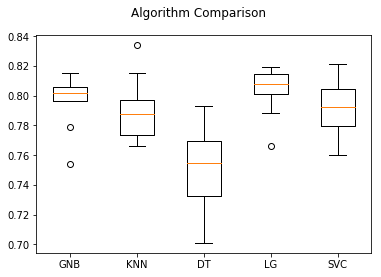

In [23]:
# Compare Algorithms Accuracy with each other on same Dataset
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc)
ax.set_xticklabels(names)
plt.show()